### **0. Set-up**

In [4]:
# Import libraries and utils
%run '../../../utils.ipynb'

In [5]:
# Load NL predicted
raw_nl_pred = pd.read_csv("../../../../data/text-embedding-3-large/nl.csv")

In [6]:
# Load EN predicted
raw_en_pred = pd.read_csv("../../../../data/text-embedding-3-large/en.csv")

# Drop rows in EN SimLex that are missing in NL SimLex
raw_en_pred = raw_en_pred.drop(raw_en_pred[(raw_en_pred['word1'] == 'bad') & (raw_en_pred['word2'] == 'awful')].index)
raw_en_pred = raw_en_pred.drop(raw_en_pred[(raw_en_pred['word1'] == 'bad') & (raw_en_pred['word2'] == 'terrible')].index)

# Reset index
raw_en_pred = raw_en_pred.reset_index(drop=True)

In [7]:
# Select first 25 word pairs
raw_nl_pred = raw_nl_pred.head(25)
raw_en_pred = raw_en_pred.head(25)

In [8]:
# Show results
raw_nl_pred

,word1,word2,similarity_score
0,oud,nieuw,0.40
1,slim,intelligent,0.26
2,hard,moeilijk,0.36
3,gelukkig,vrolijk,0.73
4,hard,stoer,0.41
5,snel,razendsnel,0.76
6,gelukkig,blij,0.68
7,kort,lang,0.38
8,dom,stom,0.38
9,vreemd,eigenaardig,0.71


In [9]:
# Show results
raw_en_pred

,word1,word2,similarity_score
0,old,new,0.57
1,smart,intelligent,0.61
2,hard,difficult,0.52
3,happy,cheerful,0.57
4,hard,easy,0.52
5,fast,rapid,0.66
6,happy,glad,0.60
7,short,long,0.63
8,stupid,dumb,0.75
9,weird,strange,0.79


### **1. Data Processing**

In [10]:
# Copy dataframe
nl_pred = raw_nl_pred.copy()

# Normalize cosine similarity to to 0-10 scale
nl_pred['scaled_similarity_score'] = 5 * (nl_pred['similarity_score'] + 1)

# Rename columns
nl_pred = nl_pred.rename(columns={'scaled_similarity_score': 'nl_pred_sl'})

# Select columns
nl_pred = nl_pred[['word1', 'word2', 'nl_pred_sl']]

In [11]:
# Copy dataframe
en_pred = raw_en_pred.copy()

# Normalize cosine similarity to to 0-10 scale
en_pred['scaled_similarity_score'] = 5 * (en_pred['similarity_score'] + 1)

# Rename columns
en_pred = en_pred.rename(columns={'scaled_similarity_score': 'en_pred_sl'})

# Select columns
en_pred = en_pred[['word1', 'word2', 'en_pred_sl']]

In [12]:
# Concatenate NL and EN DataFrames
conc = pd.concat([nl_pred, en_pred], axis=1)

# Show results
conc

,word1,word2,nl_pred_sl,word1,word2,en_pred_sl
0,oud,nieuw,7.00,old,new,7.85
1,slim,intelligent,6.30,smart,intelligent,8.05
2,hard,moeilijk,6.80,hard,difficult,7.60
3,gelukkig,vrolijk,8.65,happy,cheerful,7.85
4,hard,stoer,7.05,hard,easy,7.60
5,snel,razendsnel,8.80,fast,rapid,8.30
6,gelukkig,blij,8.40,happy,glad,8.00
7,kort,lang,6.90,short,long,8.15
8,dom,stom,6.90,stupid,dumb,8.75
9,vreemd,eigenaardig,8.55,weird,strange,8.95


### **2. Descriptive Statistics**

In [13]:
# Summary statistics SimLex-999
nl_pred_sl_summary = round(nl_pred['nl_pred_sl'].describe(), 2)
en_pred_sl_summary = round(en_pred['en_pred_sl'].describe(), 2)

# Add median SimLex-999
nl_pred_sl_summary['median'] = round(nl_pred['nl_pred_sl'].median(), 2)
en_pred_sl_summary['median'] = round(en_pred['en_pred_sl'].median(), 2)

# Create pandas DataFrame
summary_df = pd.DataFrame({
    "nl_pred_sl": nl_pred_sl_summary,
    "en_pred_sl": en_pred_sl_summary
})

# Show results
summary_df

,nl_pred_sl,en_pred_sl
count,25.00,25.00
mean,7.31,7.91
std,0.88,0.57
min,6.05,6.90
25%,6.75,7.55
50%,7.00,7.85
75%,8.15,8.30
max,8.80,9.05
median,7.00,7.85


#### **2.1. SimLex-999**

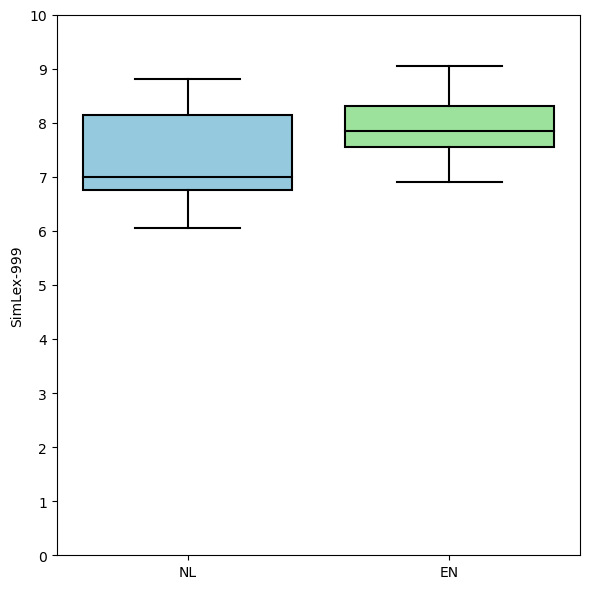

In [14]:
# Rename columns and copy
renamed_nl_pred_sl = nl_pred.rename(columns={"nl_pred_sl": "SimLex-999"}).copy()
renamed_en_pred_sl = en_pred.rename(columns={"en_pred_sl": "SimLex-999"}).copy()

# Create dummy label
renamed_nl_pred_sl['Score'] = 'NL'
renamed_en_pred_sl['Score'] = 'EN'

# Combine DataFrames
combined_data = pd.concat([renamed_nl_pred_sl, renamed_en_pred_sl])

# Create boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(
    x='Score',
    y='SimLex-999',
    data=combined_data,
    palette=['skyblue', 'lightgreen'],
    boxprops={'edgecolor': 'black'},
    whiskerprops={'color': 'black'},
    flierprops={'marker': 'o', 'color': 'black', 'markerfacecolor': 'black'},
    capprops={'color': 'black'},
    medianprops={'color': 'black'}
)

# Set labels and title
plt.ylabel('SimLex-999')
# plt.title('Comparison of SimLex-999')

# Customize y-axis ticks
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.ylim(0, 10)  # Setting y-axis limits from 0 to 10

# Remove x-axis label
plt.xlabel('')

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

### **3. Distributions**

#### **3.1. SimLex-999**

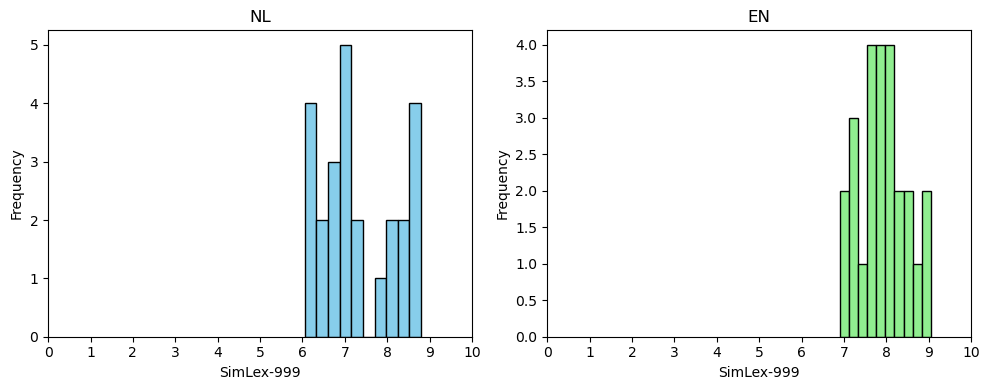

In [15]:
# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Define x-axis limits
x_min = 0
x_max = 10

# Define bins
bins = 10

# Plot NL predicted histogram
axes[0].hist(renamed_nl_pred_sl['SimLex-999'], bins=bins, edgecolor='black', color='skyblue')
axes[0].set_title('NL')
axes[0].set_xlabel('SimLex-999')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(x_min, x_max)
axes[0].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[0].grid(False) # Remove grid

# Plot EN predicted histogram
axes[1].hist(renamed_en_pred_sl['SimLex-999'], bins=bins, edgecolor='black', color='lightgreen')
axes[1].set_title('EN')
axes[1].set_xlabel('SimLex-999')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim(x_min, x_max)
axes[1].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[1].grid(False) # Remove grid

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

### **4. Outliers**

#### **4.1. NL**

In [16]:
# Count outliers
print_outlier_counts(nl_pred)

No outliers found in columns: nl_pred_sl


In [17]:
# Row outliers
print_outlier_data(nl_pred, 'nl_pred_sl')

No outliers found in nl_pred_sl


#### **4.2. EN**

In [18]:
# Count outliers
print_outlier_counts(en_pred)

No outliers found in columns: en_pred_sl


In [19]:
# Row outliers
print_outlier_data(en_pred, 'en_pred_sl')

No outliers found in en_pred_sl


#### **4.3. Add to Summary**

In [20]:
# Calculate outliers
outliers_nl_pred_sl = calculate_outliers(nl_pred, 'nl_pred_sl')
outliers_en_pred_sl = calculate_outliers(en_pred, 'en_pred_sl')

# Count outliers
count_outliers_nl_pred_sl = outliers_nl_pred_sl.shape[0]
count_outliers_en_pred_sl = outliers_en_pred_sl.shape[0]

# Add outliers count to summary
outliers_row = pd.Series([count_outliers_nl_pred_sl, count_outliers_en_pred_sl], 
    index=summary_df.columns,
    name='outliers'
)
summary_df = pd.concat([summary_df, outliers_row.to_frame().T])

# Show results
summary_df

,nl_pred_sl,en_pred_sl
count,25.00,25.00
mean,7.31,7.91
std,0.88,0.57
min,6.05,6.90
25%,6.75,7.55
50%,7.00,7.85
75%,8.15,8.30
max,8.80,9.05
median,7.00,7.85
outliers,0.00,0.00


### **5. Evaluation Metrics**

#### **5.1. Spearmans's Rank Correlation**

##### **5.1.1. NL SimLex-999 vs EN SimLex-999**

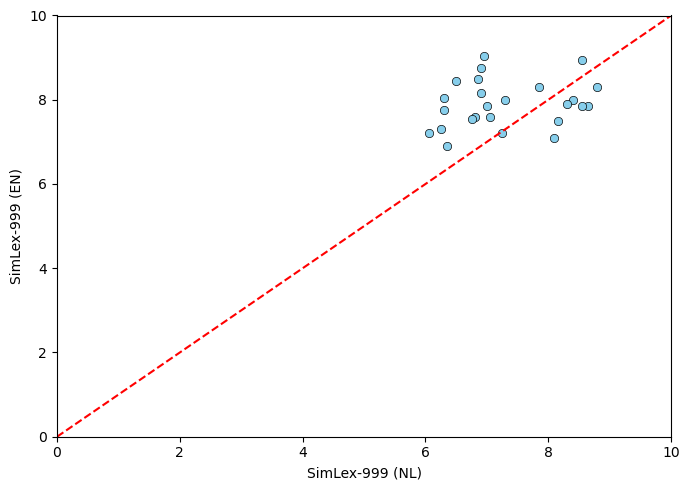

In [21]:
# Scatter plot
plot_scatter_plot(conc, 'nl_pred_sl', 'en_pred_sl', 'SimLex-999 (NL)', 'SimLex-999 (EN)', 0, 10, 0, 10)

In [22]:
# Correlation and pvalue
print_correlation_and_pvalue(conc, 'nl_pred_sl', 'en_pred_sl')

Spearman's Rank correlation: 0.23704
P-value: 0.2539219687289424
The correlation is not statistically significant.



#### **5.2. Mean Square Error (MSE)**

In [23]:
# Calculate Mean Squared Error
mse = mean_squared_error(conc['nl_pred_sl'], conc['en_pred_sl'])

# Show results
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 1.20


#### **5.3. Mean Absolute Error (MAE)**

In [24]:
# Calculate Mean Absolute Error
mae = mean_absolute_error(conc['nl_pred_sl'], conc['en_pred_sl'])

# Show results
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 0.95


#### **5.4. Bland-Altman**

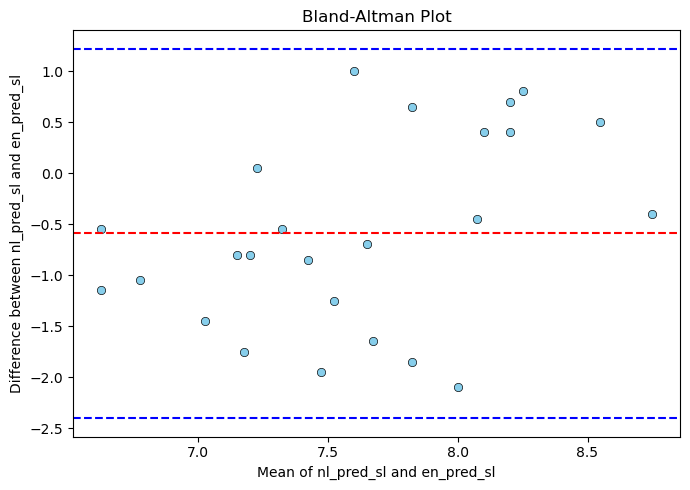

In [25]:
# SimLex-999
bland_altman_plot(data1=conc['nl_pred_sl'], data2=conc['en_pred_sl'])